# Comparison

This notebook contains side-by-side comparisons of the figures in the 2022 version (left) and the 2023 version (right). Based on data from the following experiments:

Legend:
 - ❌ no results
 - ☑️ results from 2021Q3
 - ✅ results from 2023Q2

| [framework](https://github.com/openml/automlbenchmark/blob/12046acc4824dd48414c0543b518cd628490a12d/resources/frameworks_2023Q2.yaml) | [classification, 1h](https://www.openml.org/s/271) | [classification, 4h](https://www.openml.org/s/271) | [regression, 1h](https://www.openml.org/s/269) | [regression, 4h](https://www.openml.org/s/269) |
|--|:--:|:--:|:--:|:--:|
| AutoGluon (benchmark) | ✅ | ✅ | ✅ | ✅ | 
| AutoGluon (high quality)| ✅ | ✅ | ✅ | ✅ | 
| AutoGluon (high quality, infer limit) | ✅ | ❌ | ✅ | ✅ | 
| autosklearn | ✅ | ✅ | ✅ | ✅ | 
| autosklearn 2 | ✅ | ☑️ | ❌ | ❌ | 
| flaml | ✅ | ✅ | ✅ | ✅ | 
| GAMA (benchmark) | ✅ | ☑️ | ✅ | ☑️ | 
| H2O AutoML | ✅ | ✅ | ✅ | ✅ | 
| Light AutoML | ✅ | ✅ | ✅ | ✅ | 
| MLJar Supervised (benchmark) | ✅ | ☑️ | ✅ | ✅ | 
| MLJar Supervised (perform) | ✅ | ❌ | ✅ | ✅ | 
| mlr3automl | ☑️ | ☑️ | ☑️ | ☑️ | 
| Naive AutoML | ✅ | ❌ | ✅ | ❌ | 
| TPOT | ✅ | ☑️ | ✅ | ☑️ | 
| RandomForest | ✅ | ✅ | ✅ | ✅ | 
| TunedRandomForest | ☑️ | ☑️ | ☑️ | ☑️ |

🚨 **important:** Whenever results from 2021 are used (☑️ above), this is denoted with an asterisk (\*).

## Figure 2
Still have to make TunedRandomForest not cut off.

| 2021 | 2023|
|--|--|
|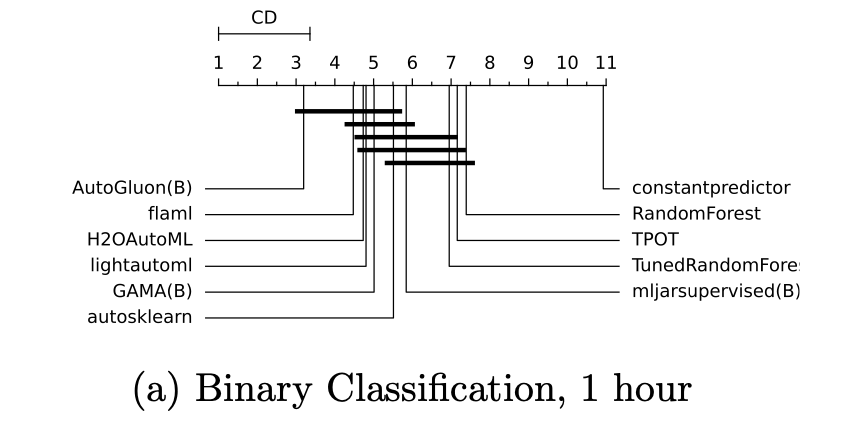| 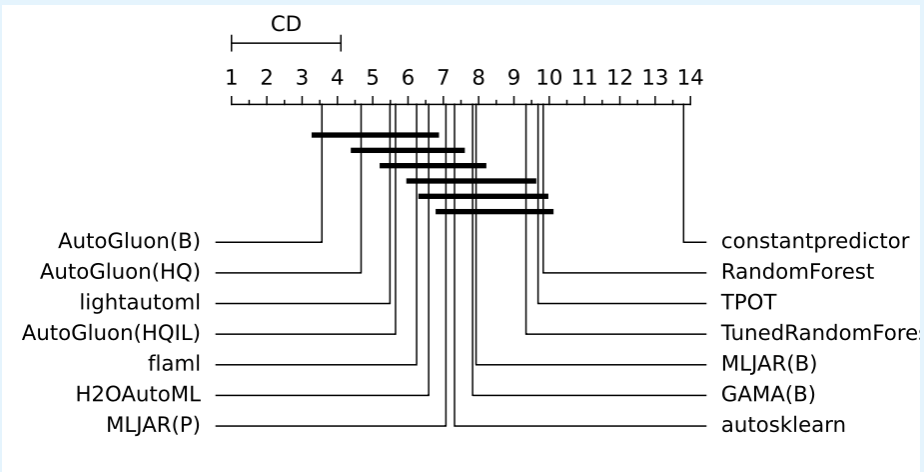 |
|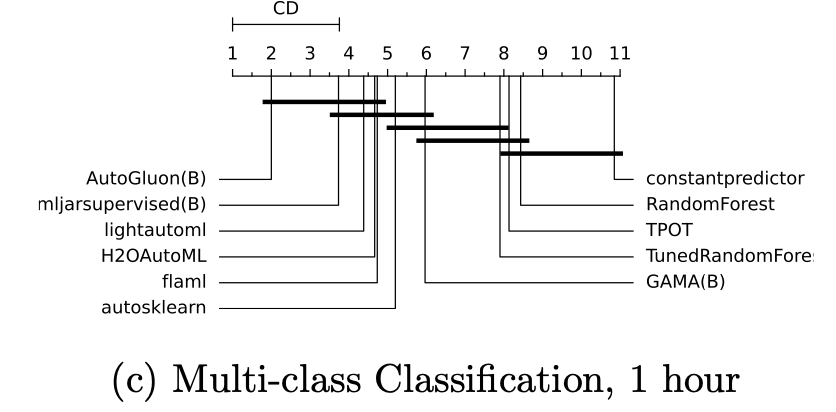| 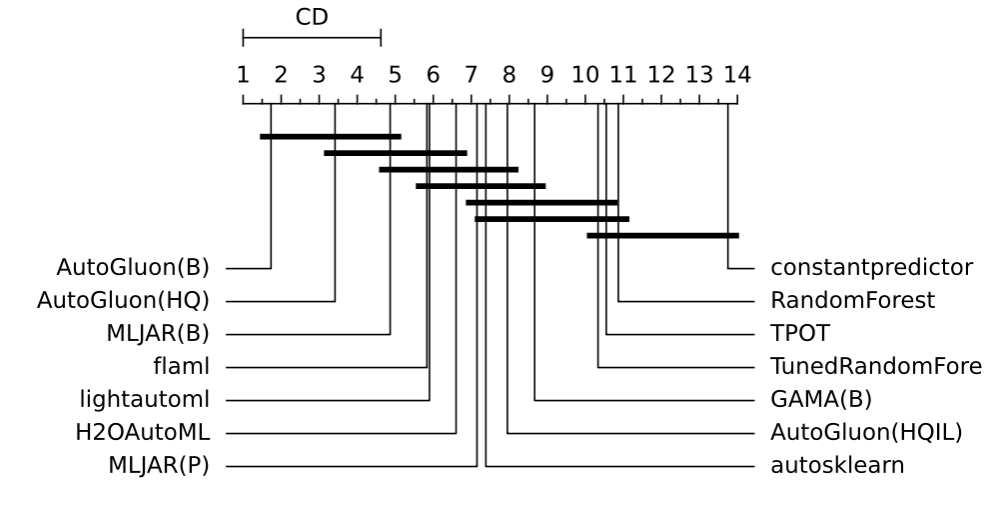 |
|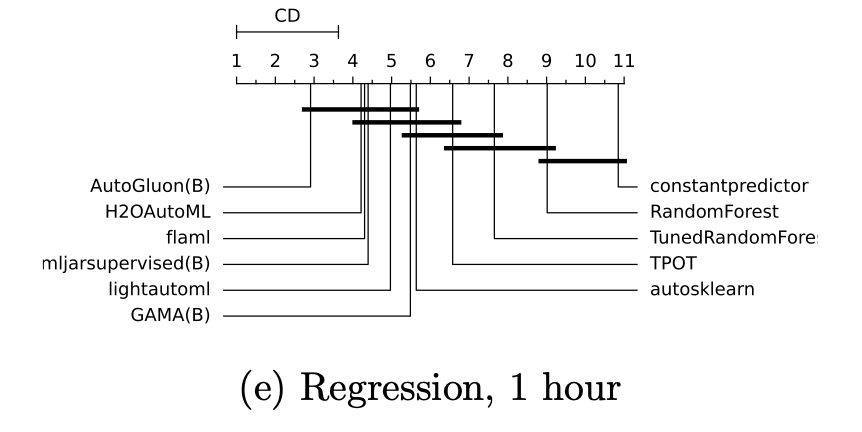| 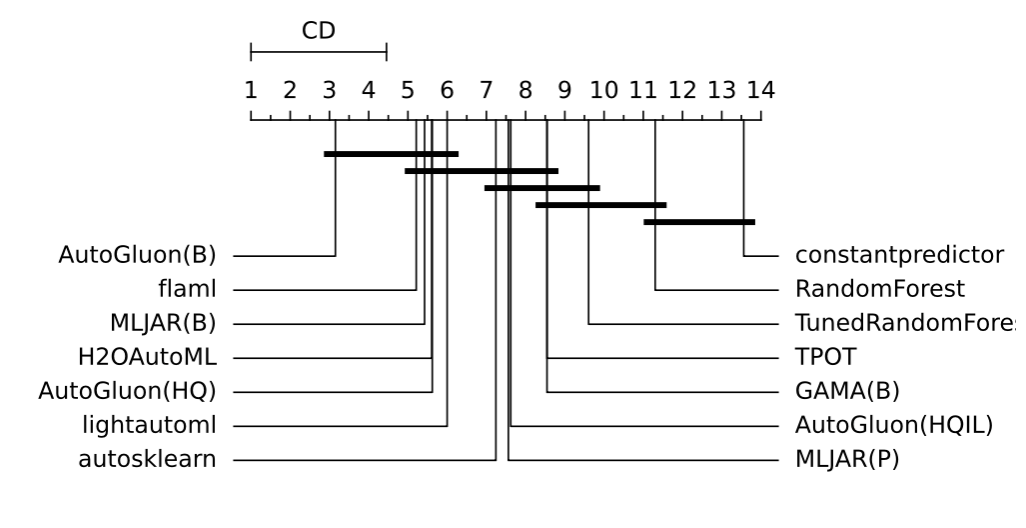 |
|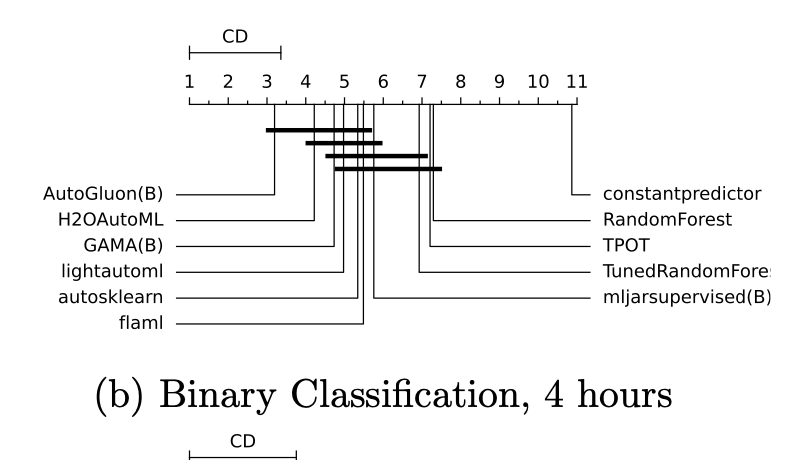| 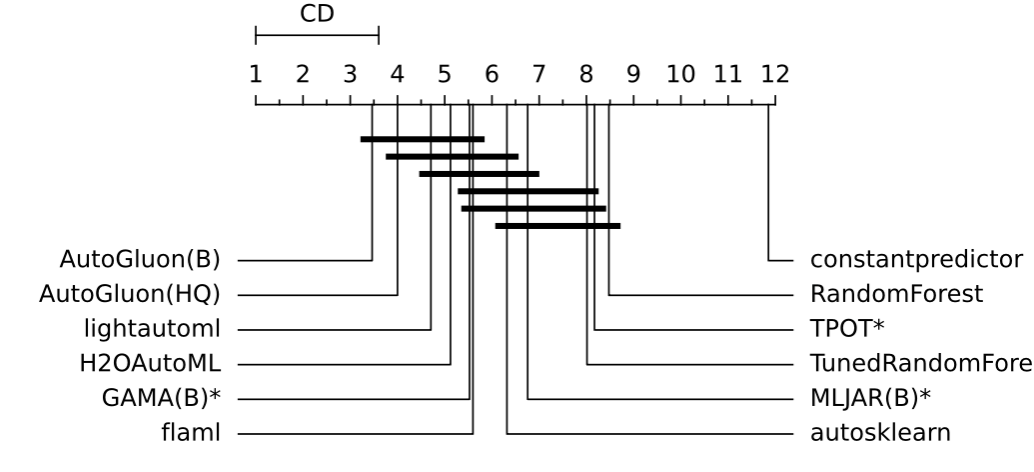 |
|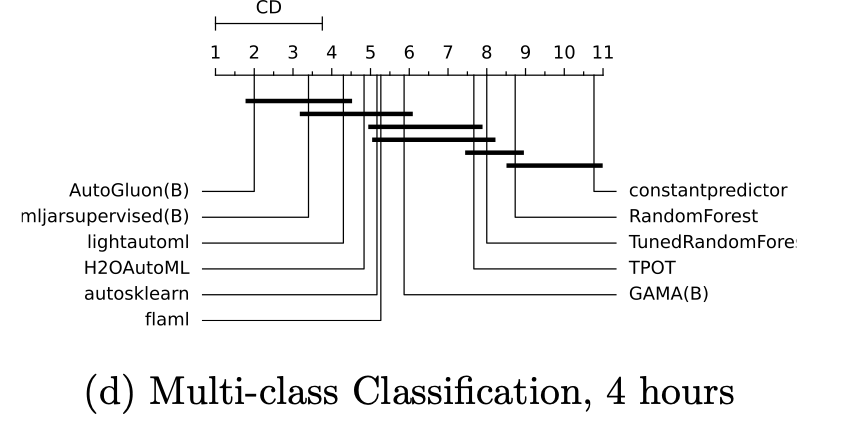| 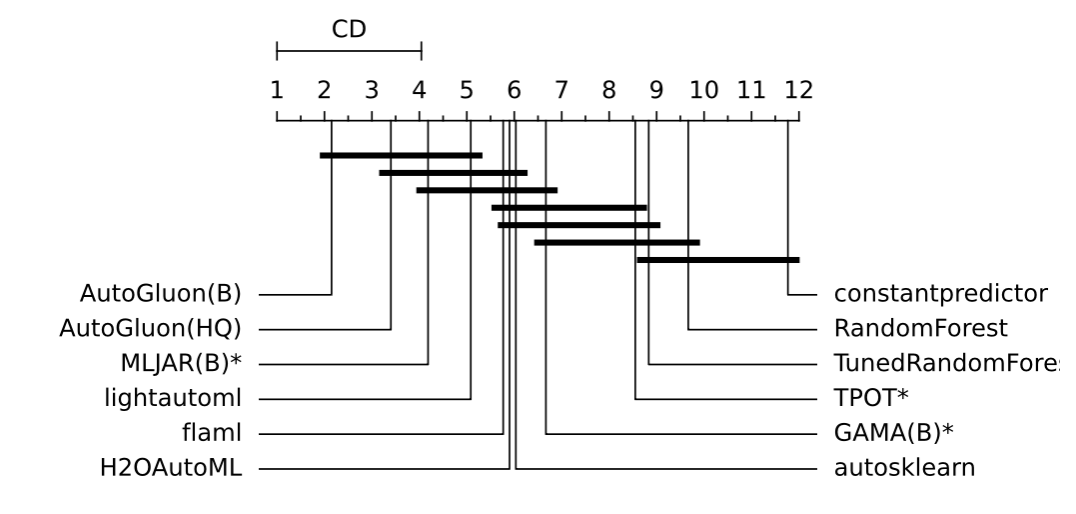 |
|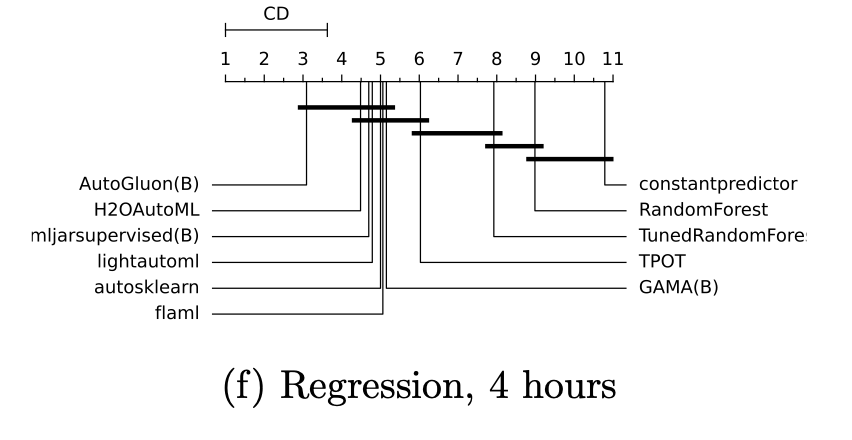| 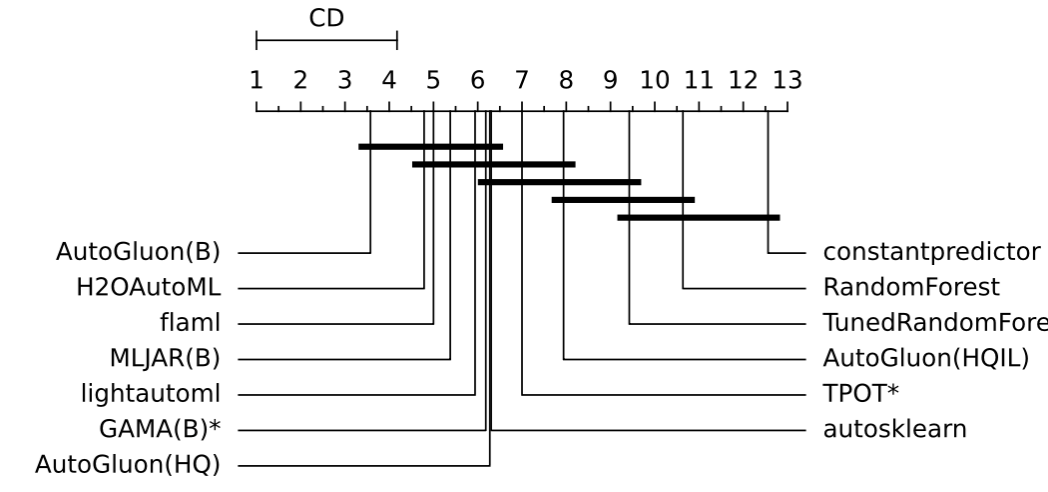 |
|n/a| 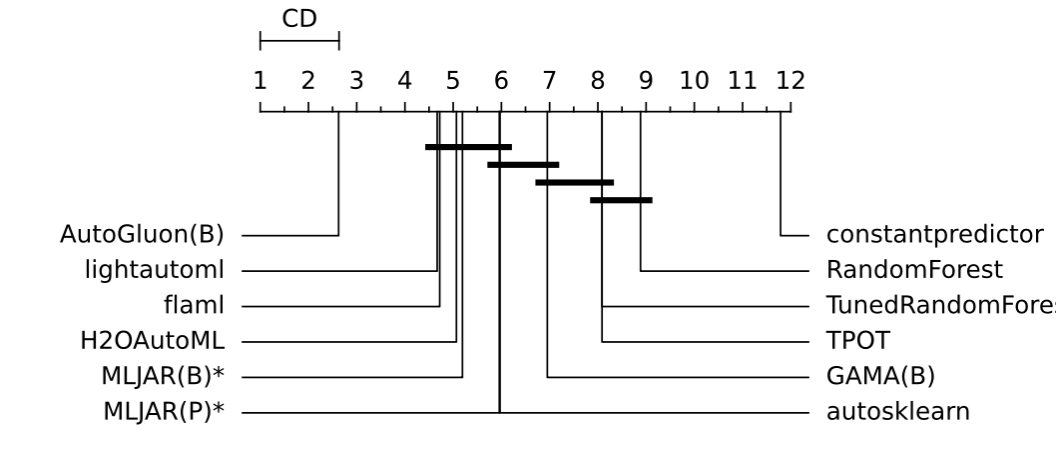|
|n/a| 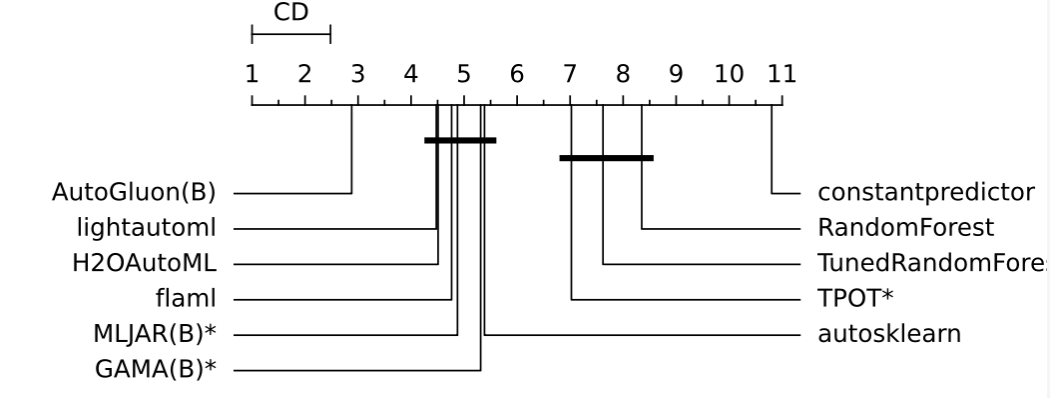 |

# Figure 3
Note: changed the color of `TunedRandomForest` from dark red to brown to better distinguish it from `TPOT` color.


| 2021 | 2023|
|--|--|
|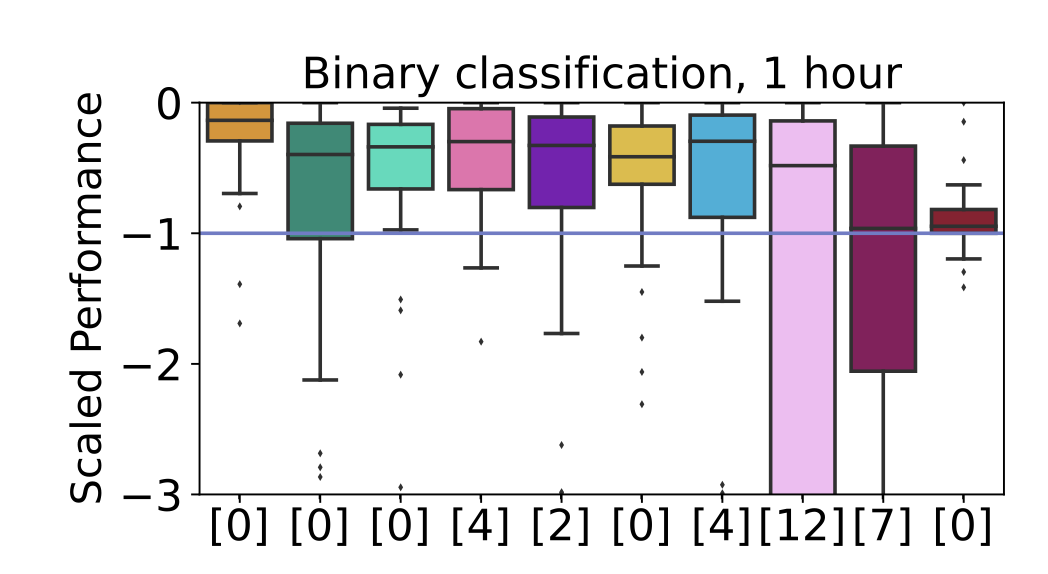| 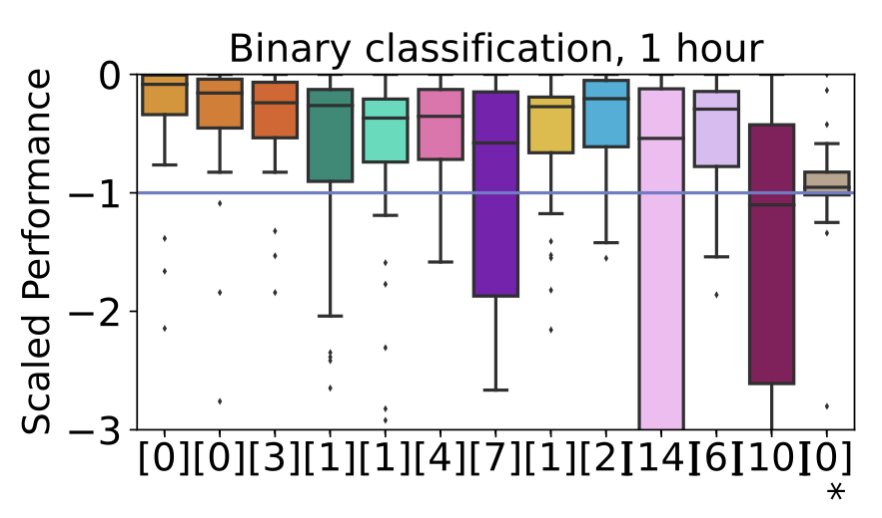 |
|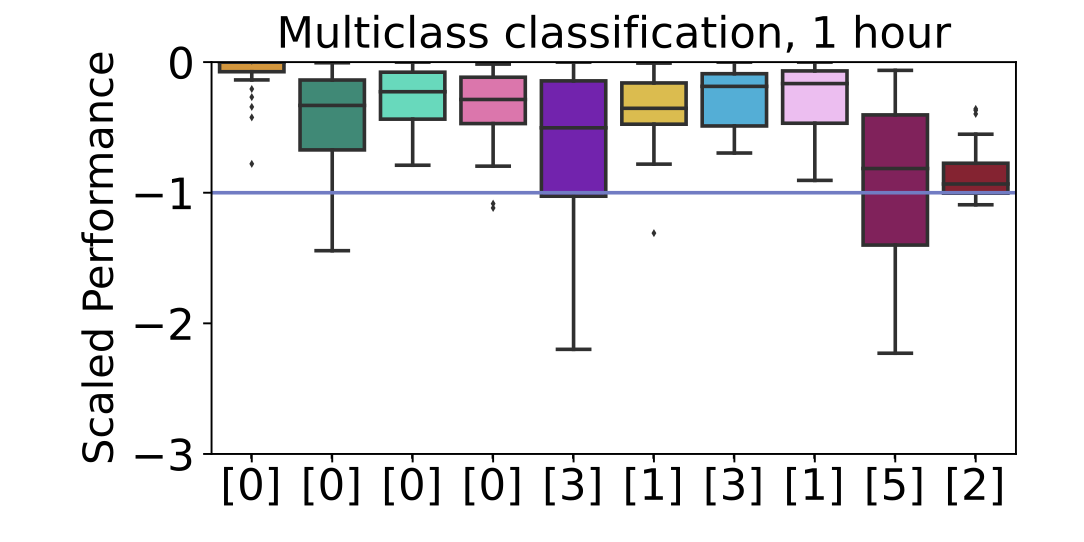| 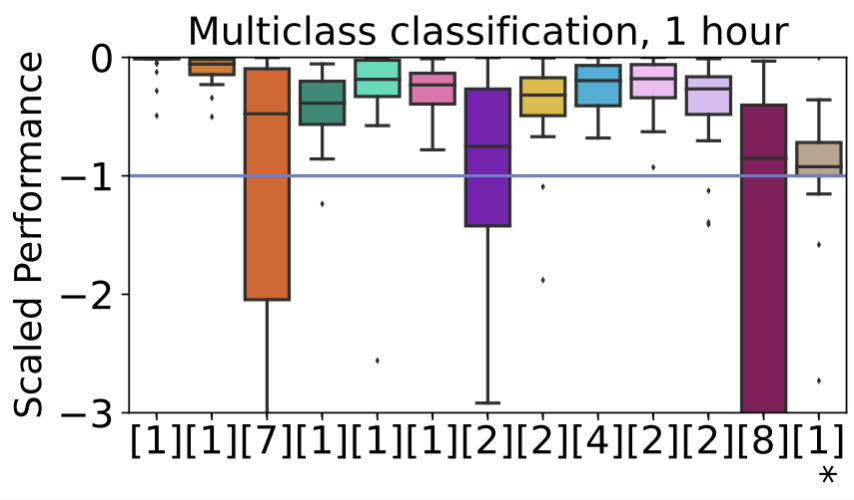 |
|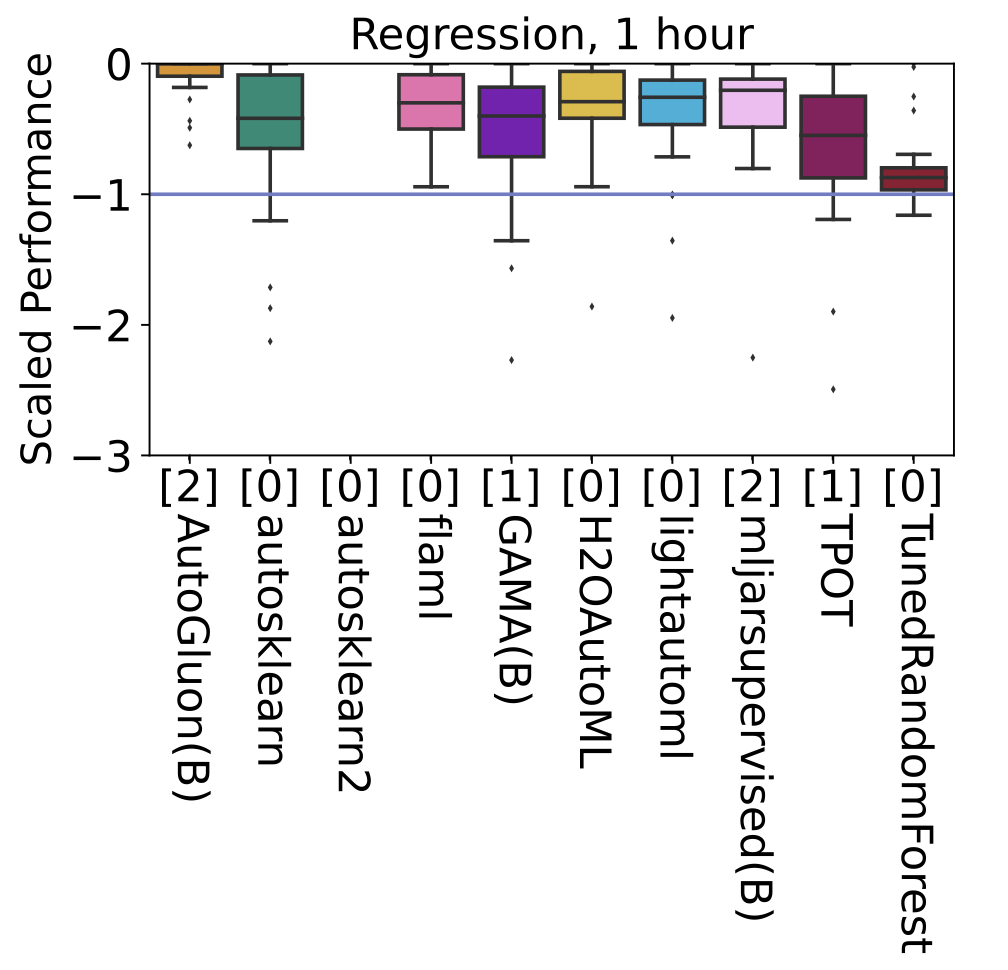| 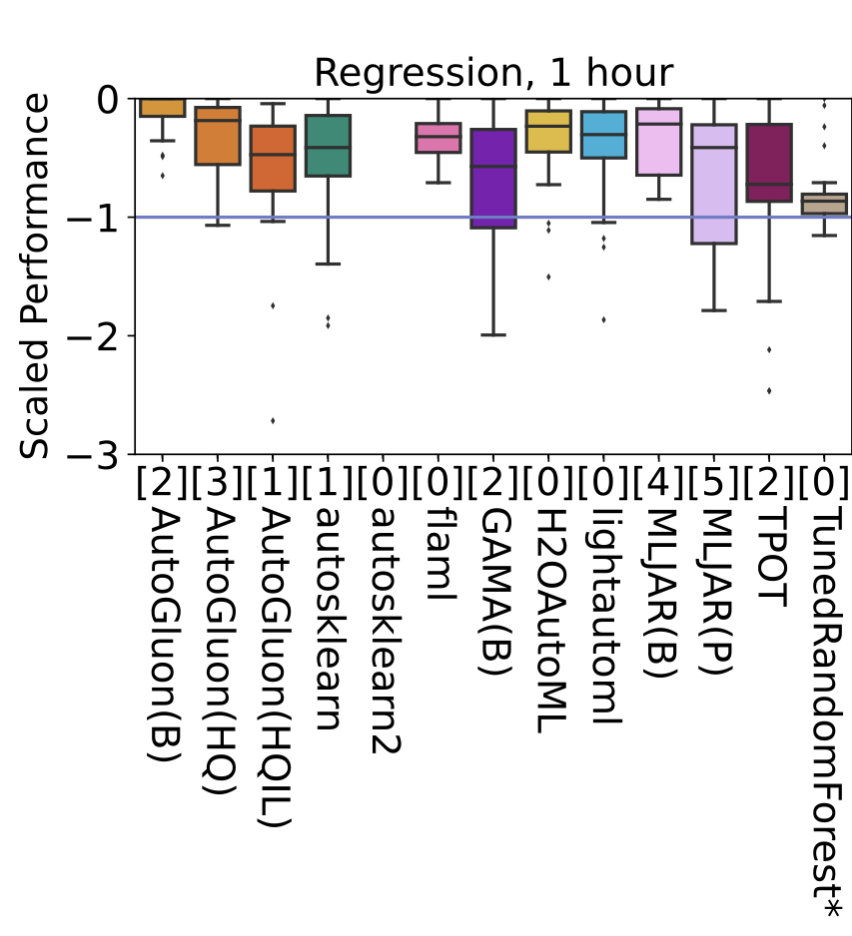 |
|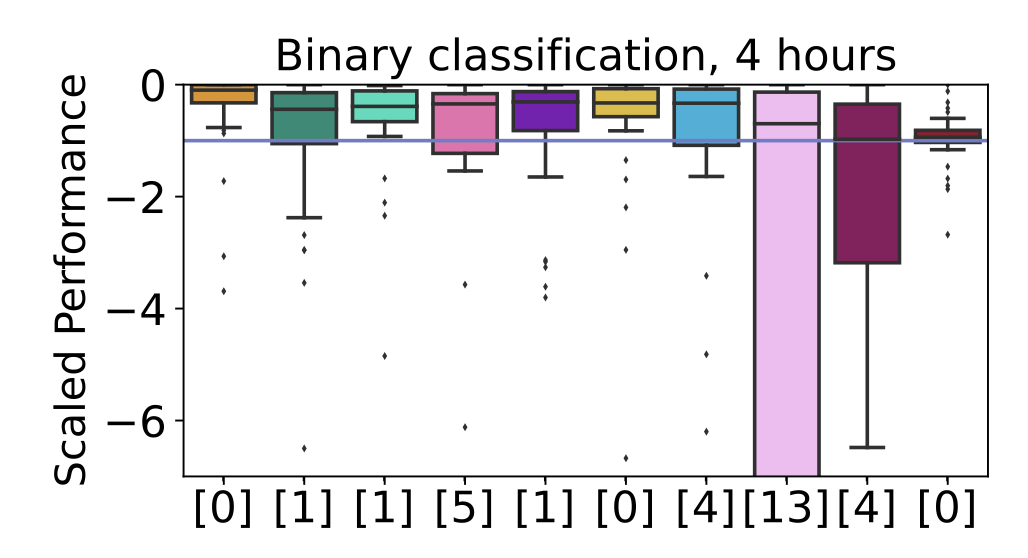| 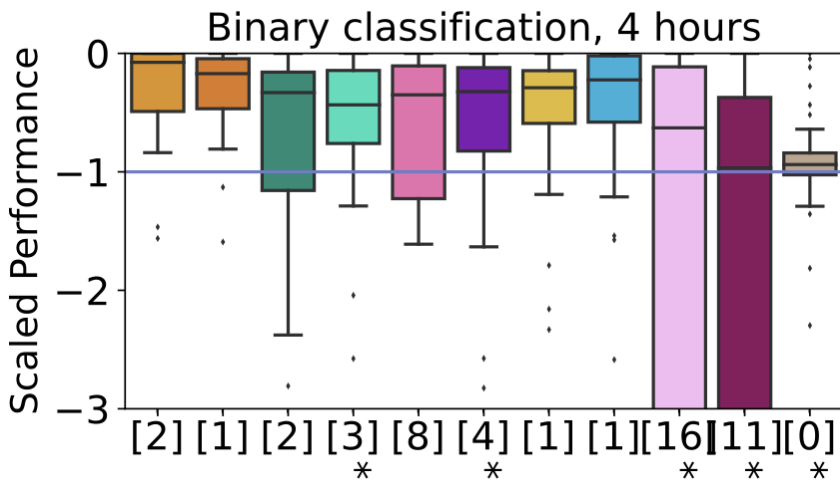 |
|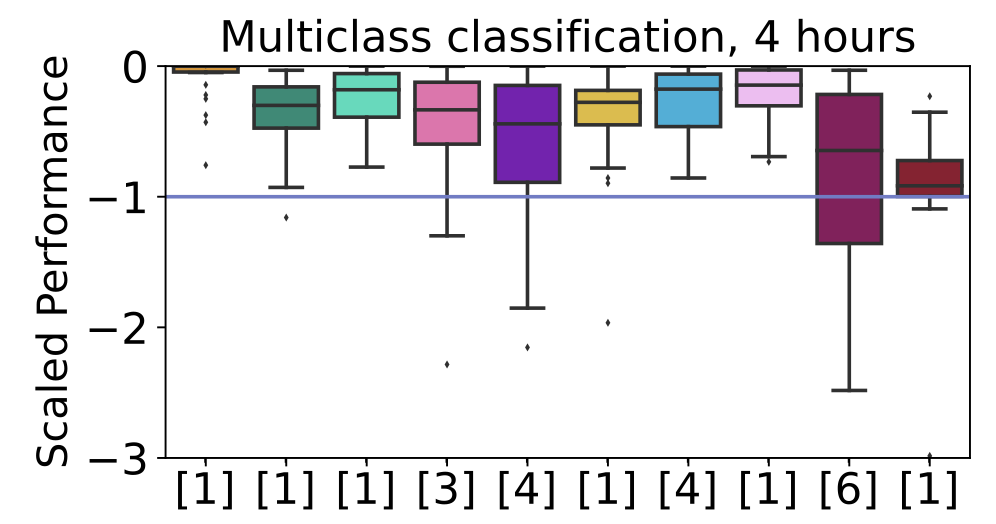| 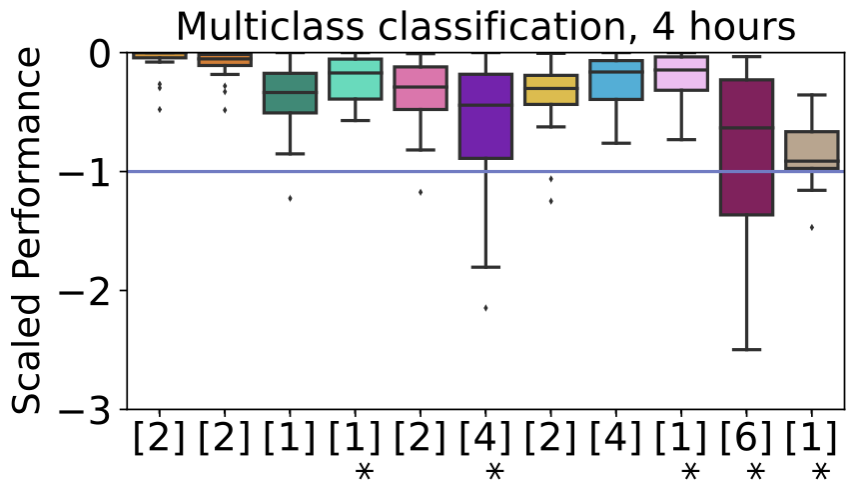 |
|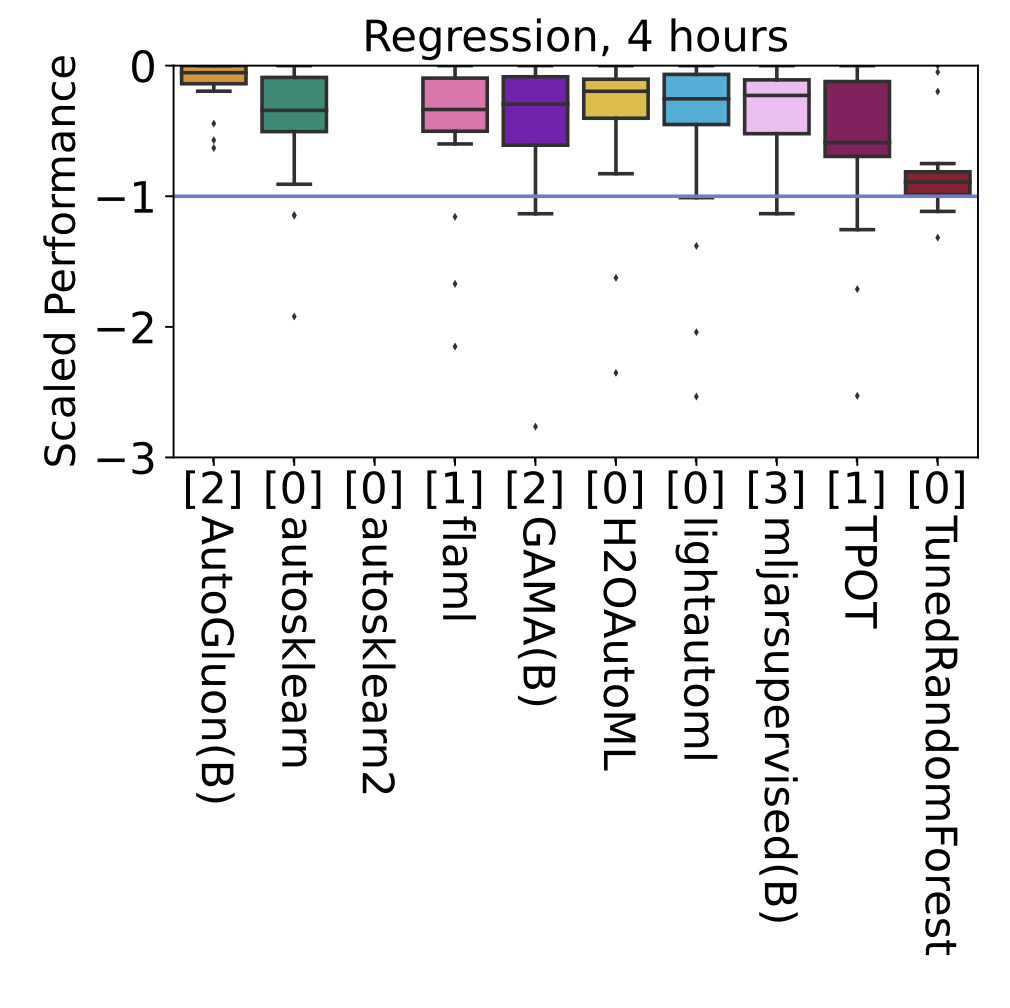| 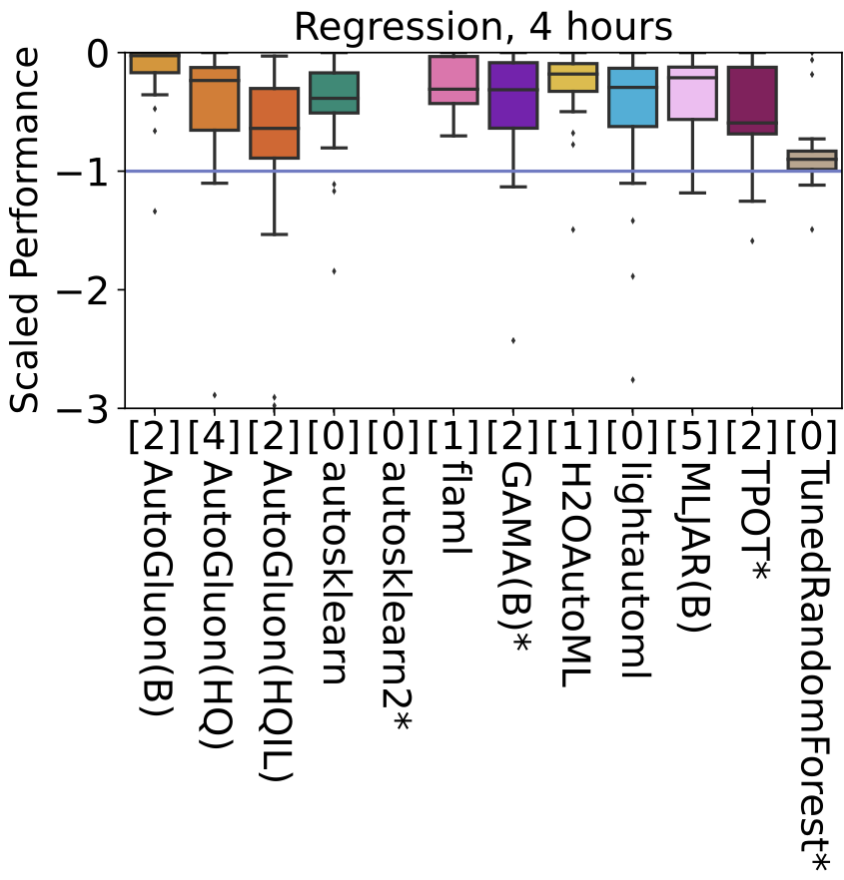 |

# Figure 4
Not included. Bardley-Terry trees not recreated. Stefan will take care of this.

# Figure 5
Figures on the right now use the same color code as the other figures in the paper, we also record the number of omitted outliers. They also only use measurements from the one-hour budget experiments.

**Note**: inference speeds of the bottom two plots are not measured in the same way. This is explained in the cell below (to make it easily collapsable).


Previously, we just measured time for inference on the test data. This was a single measurement, is affected by test set size, and included loading the dataset for some frameworks, but not for others.

In the new experiments, we set up repeated measurements for inference time on a random sample (with replacement) from the test set of 1, 10, ..., up to 10,000 rows. This is now always including the loading of the dataset, except for inference of one row which works with in-memory data. These measurements are only recorded on the 1 hour constraint, *and only for models which were fast enough to complete in the time window*! That is, we tried to run the experiment with measurements, and if they failed because the inference time measurements took too long to complete, they were run again without inference time measurements. For each (task, fold) which was rerun without inference time measurements, we record the number by the plot.

TPOT is the exception in that the dataset for TPOT is already preprocessed with imputation. This is likely the main reason it is much faster than other scikit-learn based tools.

Below, the first two rows are for reference and are created as before, but I suggest that with the updated paper we actually use the bottom two figures.

| 2021 | 2023|
|--|--|
|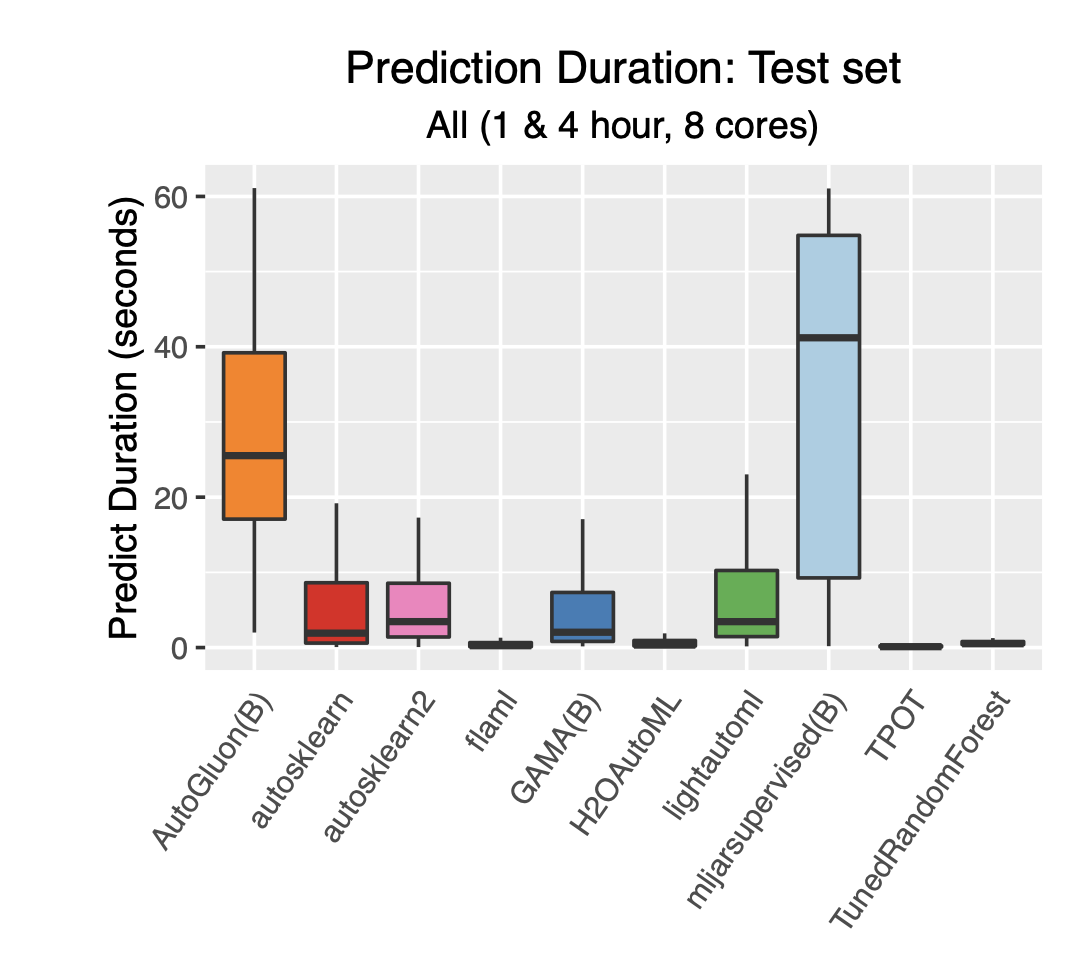| 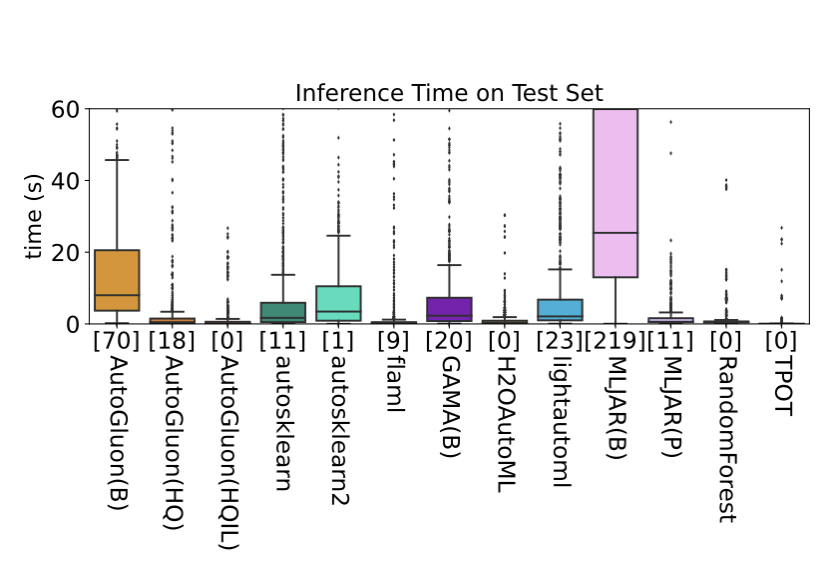 |
|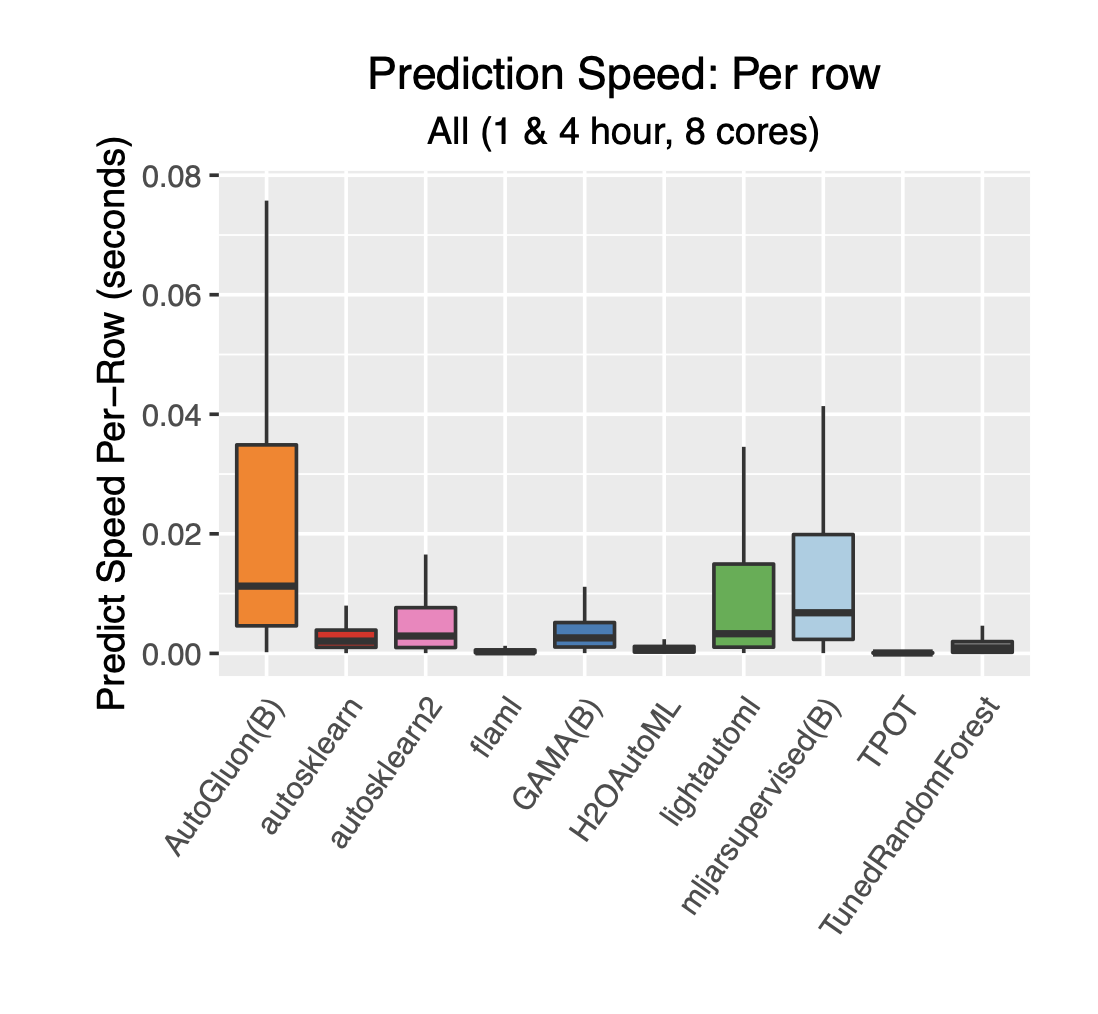| 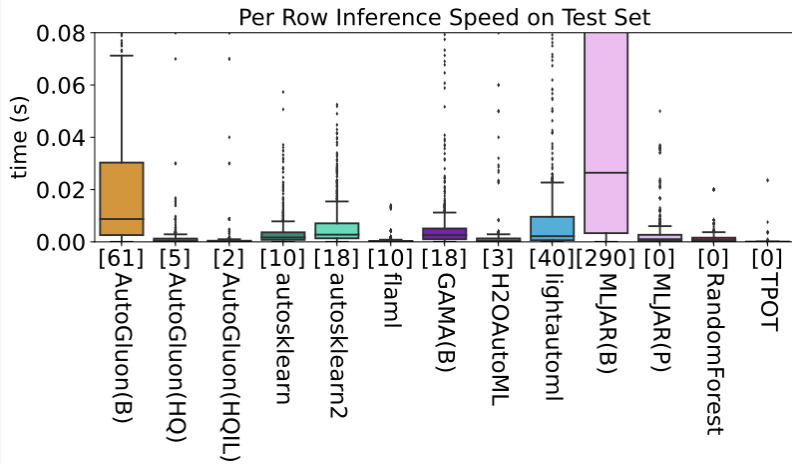|
|n/a <br/><br/> Explanation for Figure on the right:  rows/s for per-row in-memory inference. Numbers on x-axis denote that produced models were too slow to measure in the given time window. Results from H2O are unavailable since direct inference on a pandas dataframe is unavailable. | 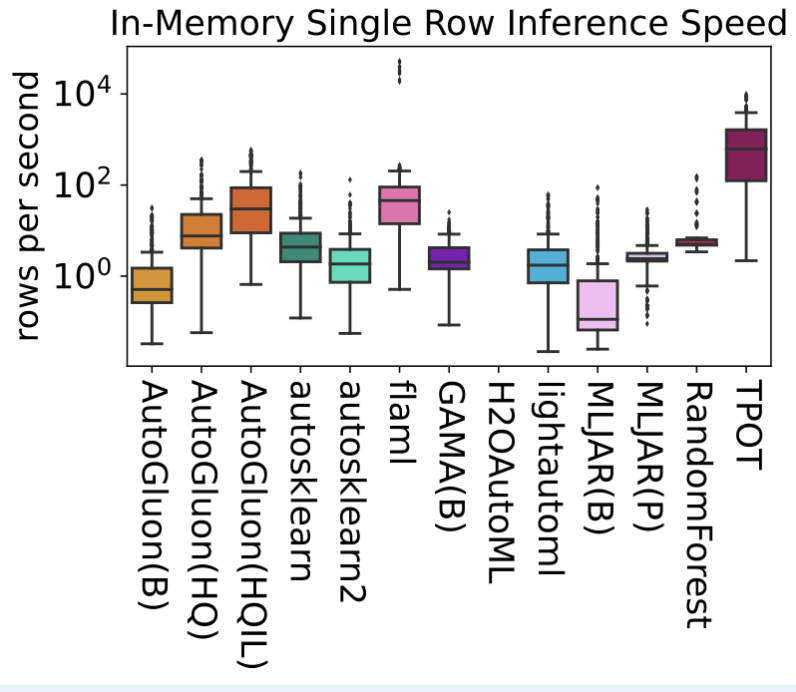 |
|n/a <br/><br/> Explanation for Figure on the right: rows/s for 10,000-row from-disk batch inference. Numbers on x-axis denote that produced models were too slow to measure in the given time window. | 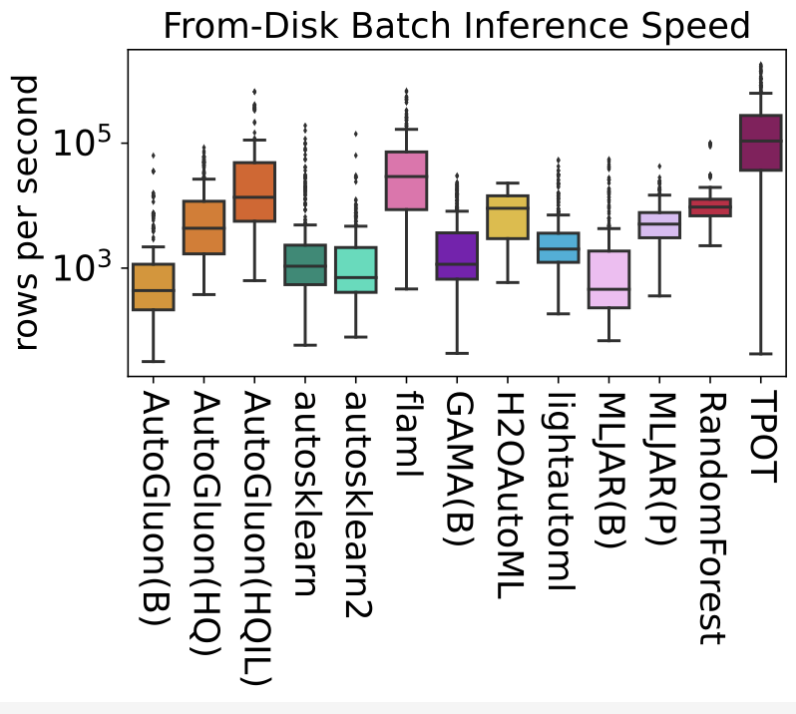|

# Figure 6
**important:** color legend is different (now matches the other Python plots) and the pareto optimal is now top-right instead of top-left.

I am not sure how the figures on the left were generated. For figures on the right, each point represents the median scaled performance (across all tasks for that framework) and the median rows per second (as measured with 10,000 rows from-disk batch inference speed).

Because we don't have the 10,000 batch inference measurements for 4 hour budgets, we omit those plots. However, we could also provide the normalized inference times as before.


| 2021 | 2023|
|--|--|
|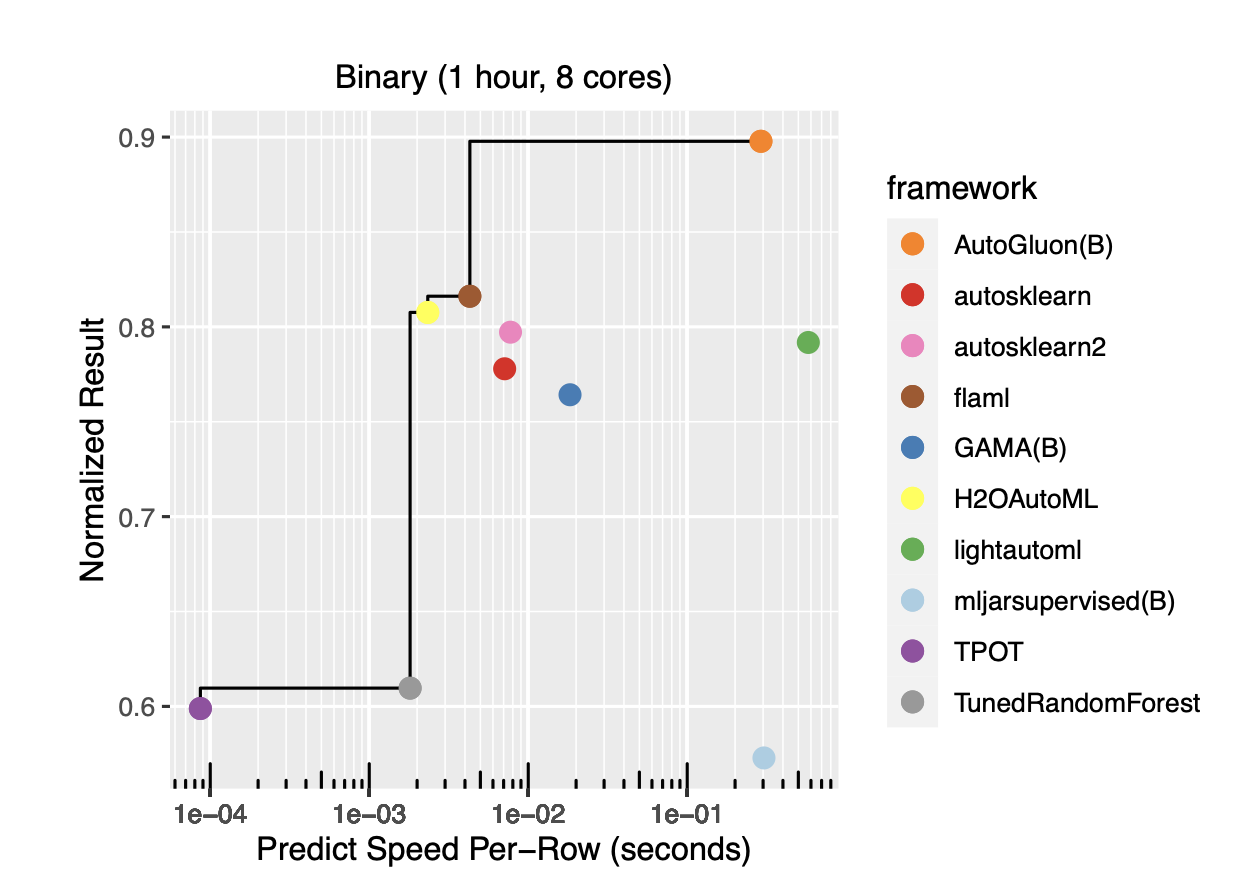| 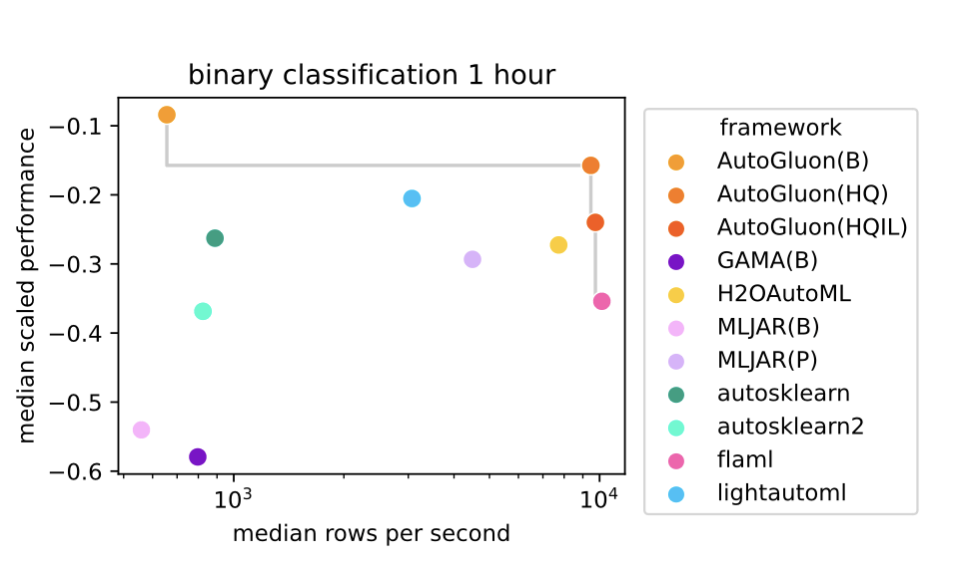 |
|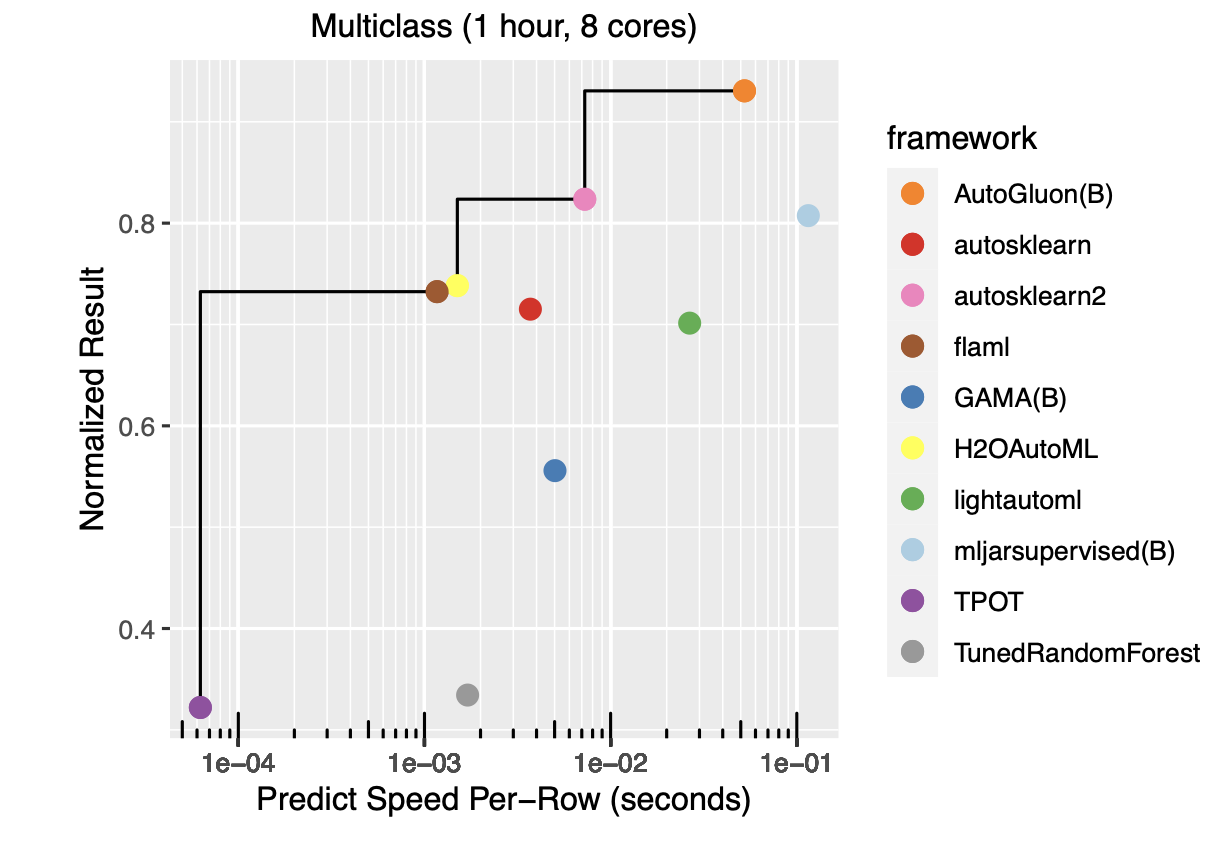| 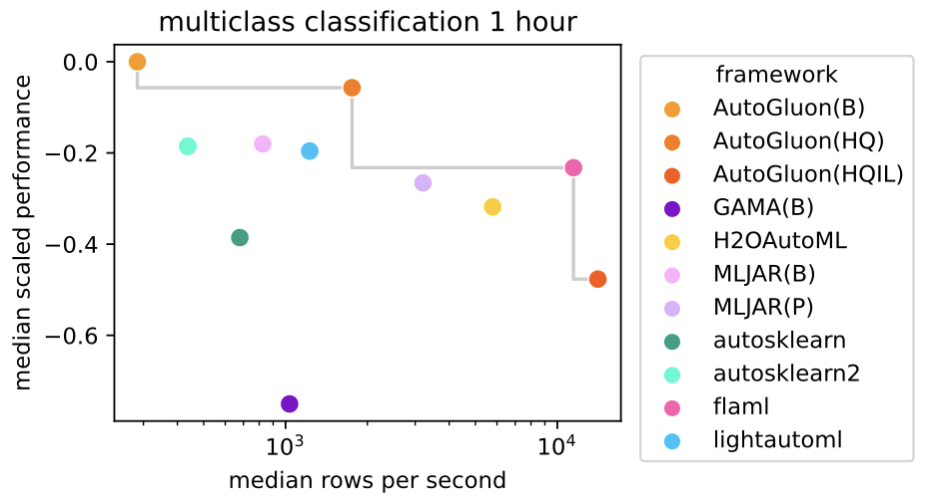 |
|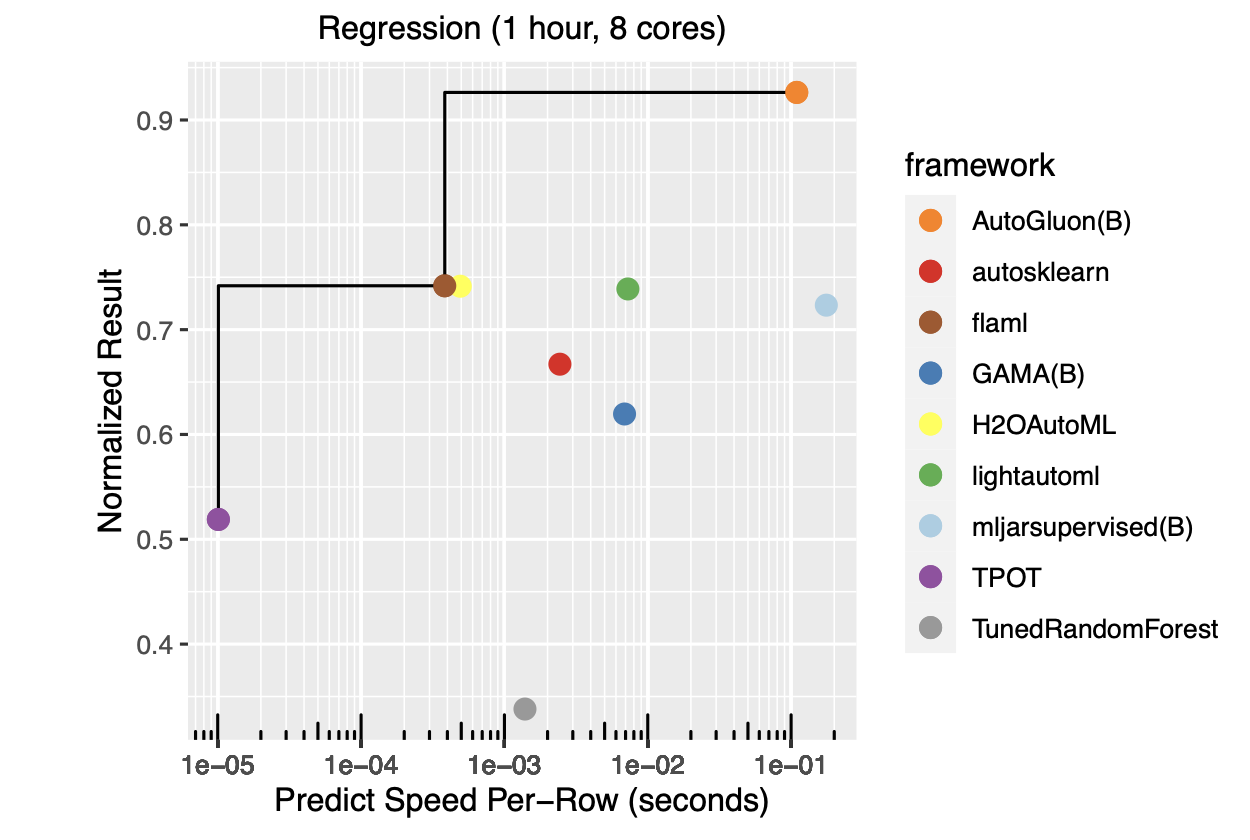| 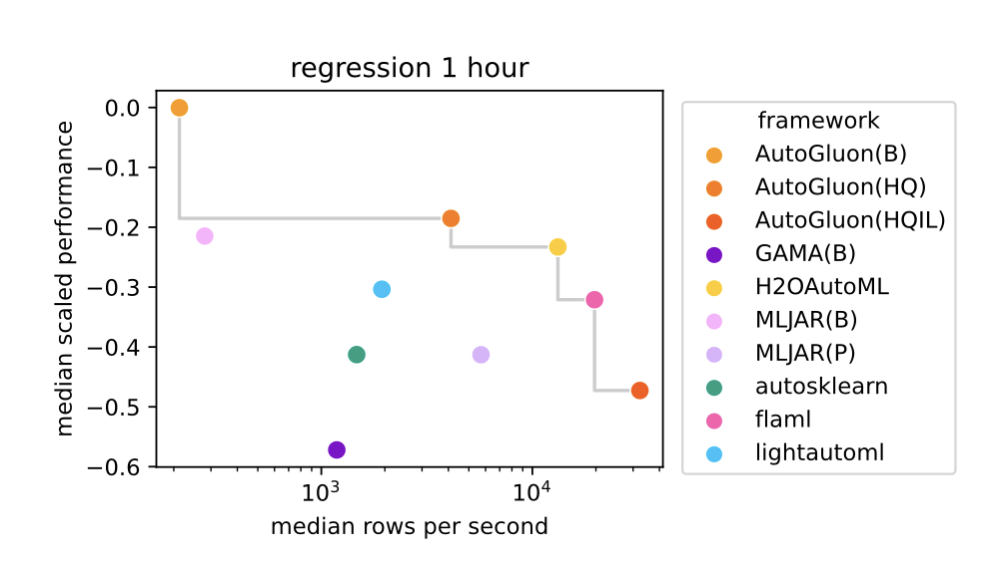 |
|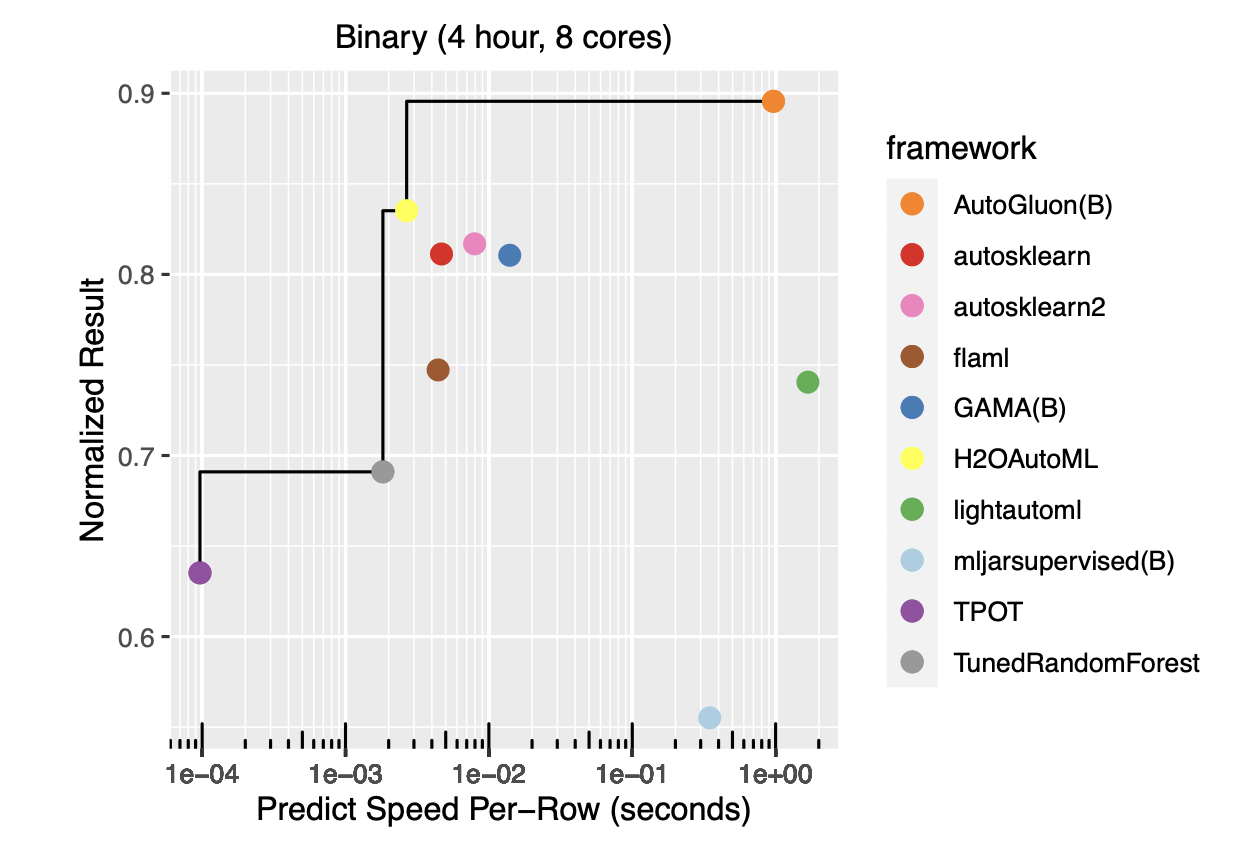| n/a: see note above |
|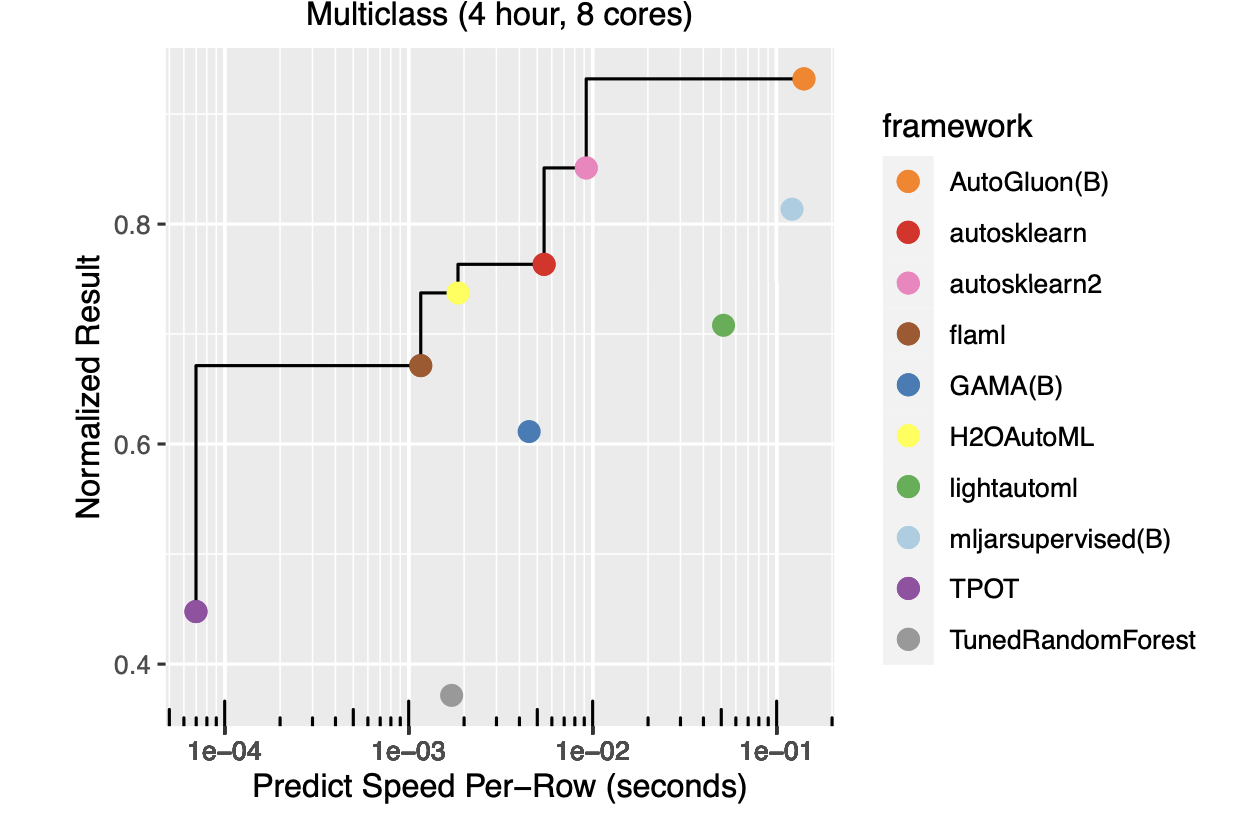| n/a: see note above |
|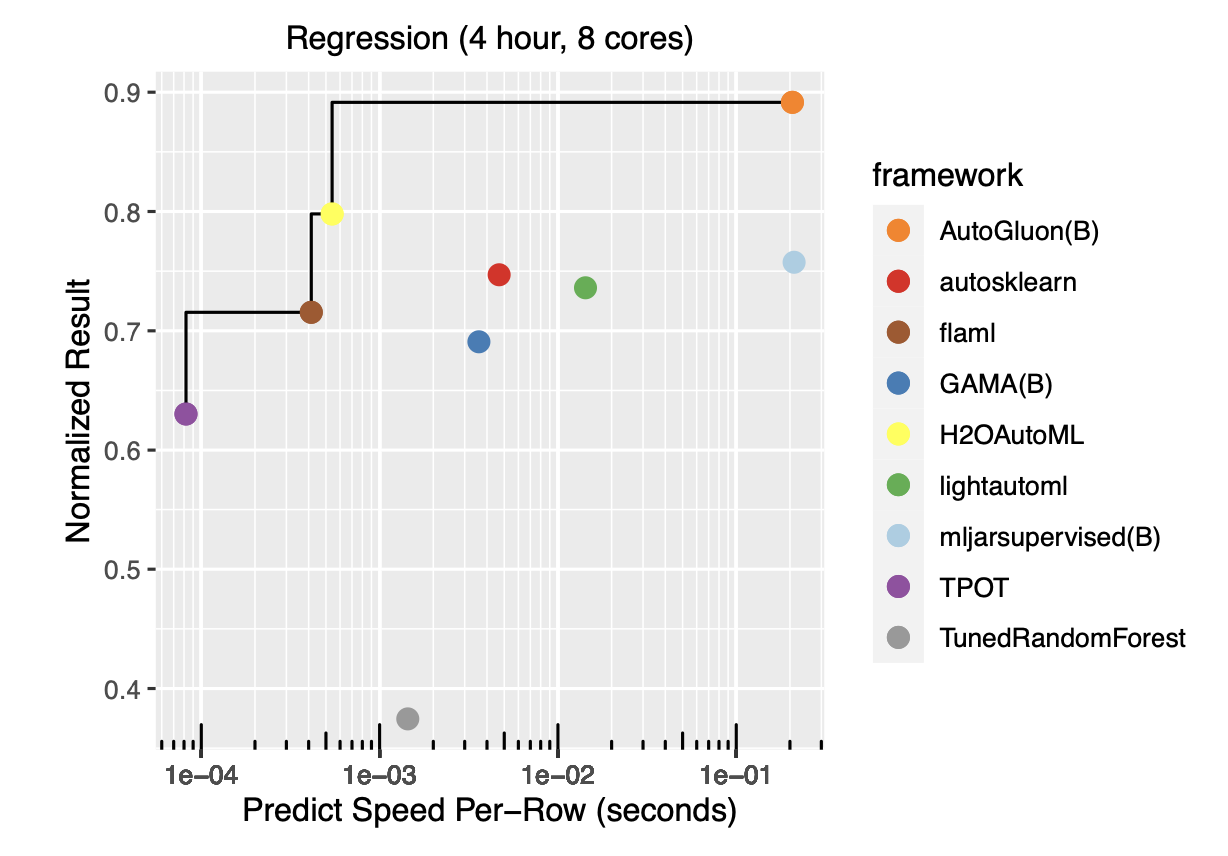| n/a: see note above |

# Figure 7
The grey errors marked "investigate" on the right are likely from a bug that was introduced in AutoGluon 0.8 (released days before the experiments) and is already fixed (in 0.8.1). Waiting on confirmation for this. If that is the case, I suggest we mark them with a separate color as "fixed". It is important that the readers understand the amount of errors involved for each framework as this affects e.g., the scaled performance plot above (AG HQIL performing much worse). However, I would suggest removing them from the second plot (errors by dataset size).

**note:** There are many more implementation errors this time around, so for now I filtered those from the scatterplot. That now only shows timeout, memory, and data errors. Unlike last time, quite a few implementation errors also happened on smaller classification datasets which does't isolate the `yeast` and `wine` datasets as nicely. Perhaps including both a scatterplot with and without implementation errors included is best.

| 2021 | 2023|
|--|--|
|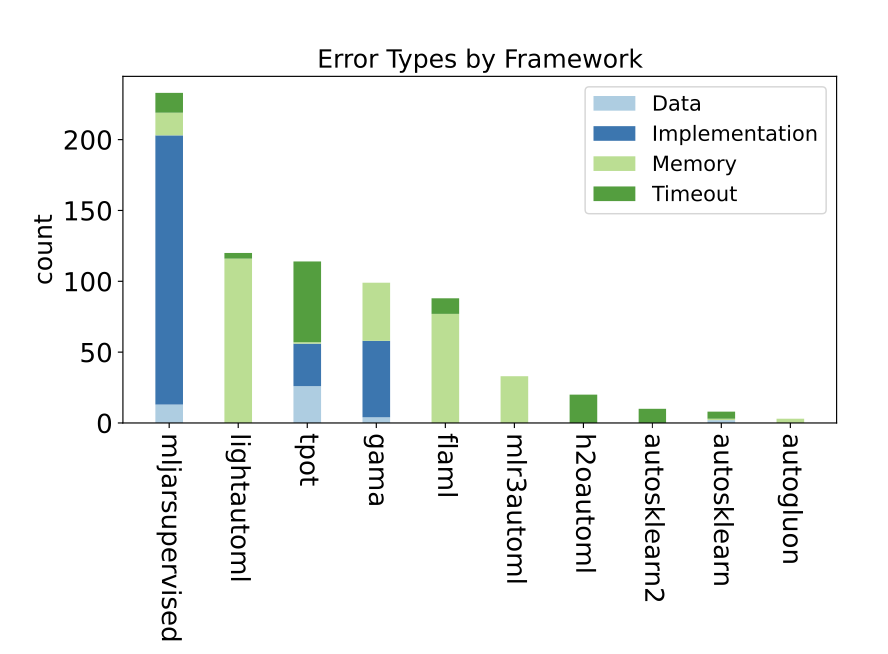| 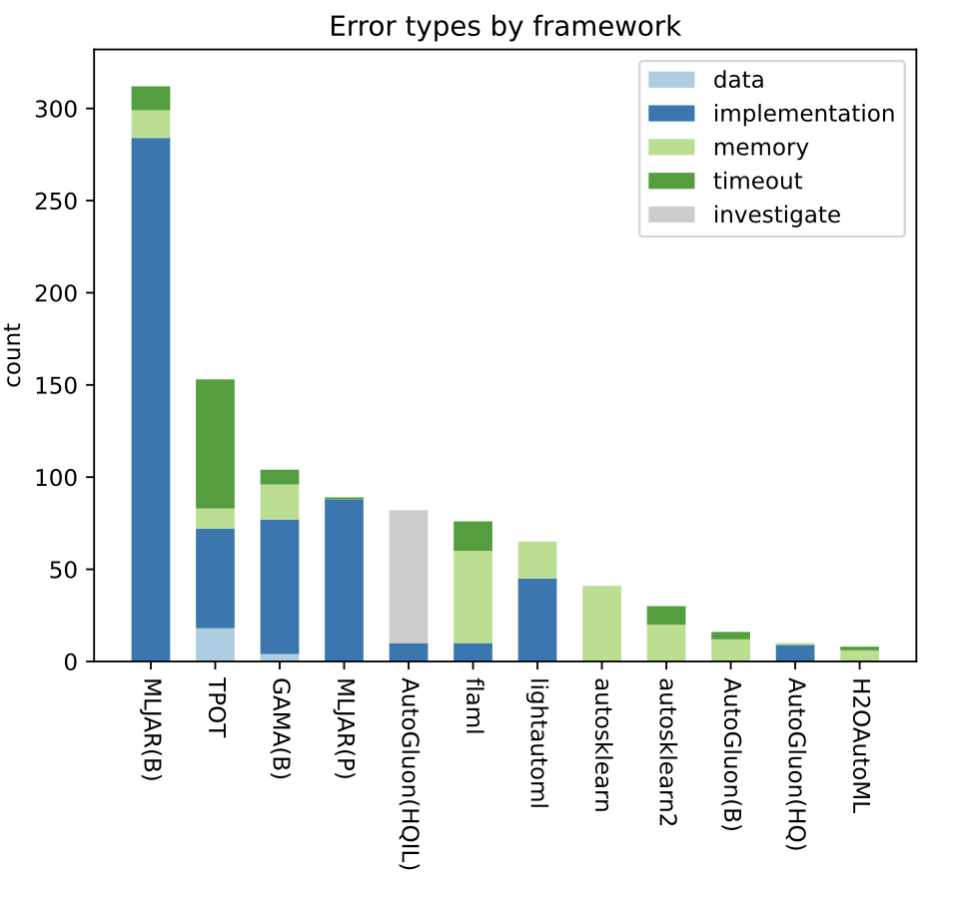 |
|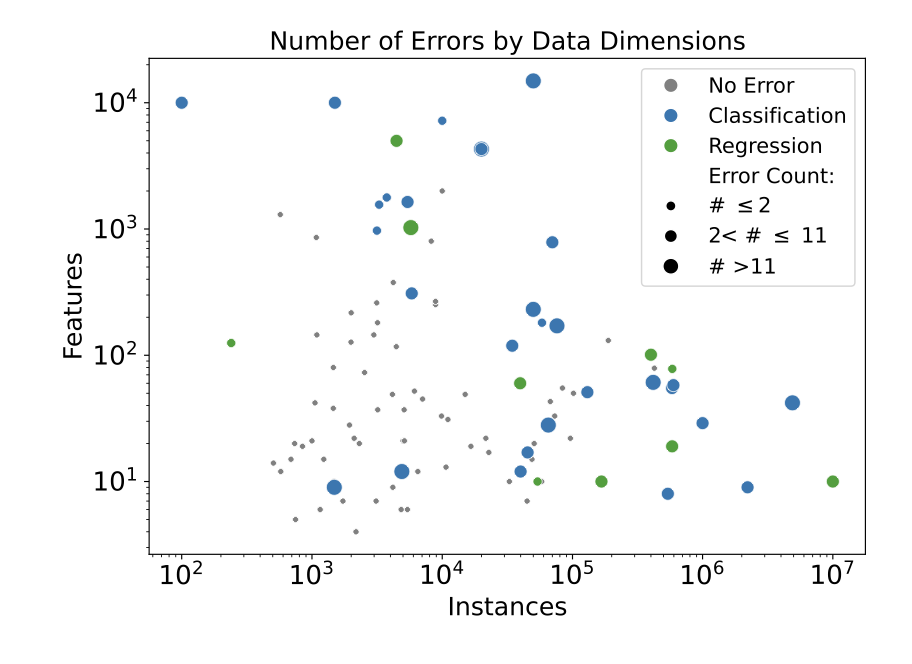| 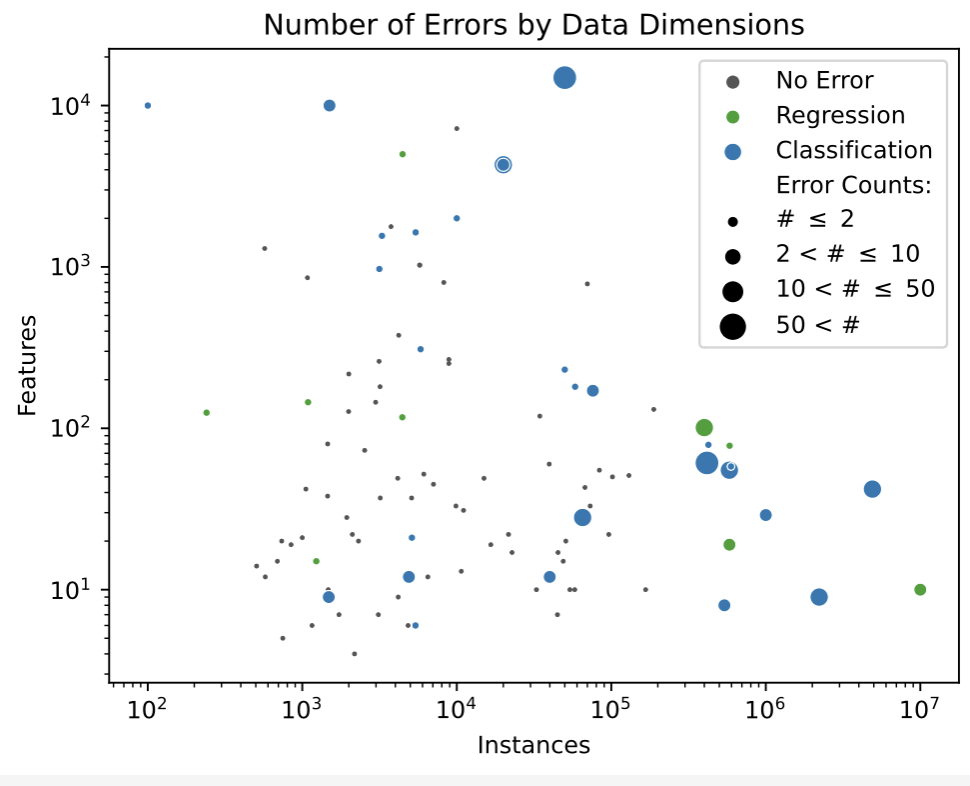|

# Figure 8 
With the introduction of inference time measurements, we also introduced additional allowed overhead. This makes it so that the hard cut-off is different for experiments which had the inference time measurements enabled from those who did not. Currently only displaying a line for the maximum cut-off (i.e., with inference time measurements included). The soft-constraint (1 hour/ 4 hour) is identical across experiments, except for AutoGluon HQ/HQIL, see cell below (or Slack discussion).

AutoGluon HQ/HQIL perform a post-processing step which explicitly takes places _after_ search is completed, without taking into account the overall runtime constraint. We had a discussion with Nick Erickson (AWS, AutoGluon dev) and he indicated to expect 10~15% overhead, which matched some of the earlier validation experiments that we did. Based on that discussion we agreed (with Nick), that we would set the runtime constraint for HQ/HQIL to 90% of the total time so that the overall expected budget is comparable to that of other frameworks.

| 2021 | 2023|
|--|--|
|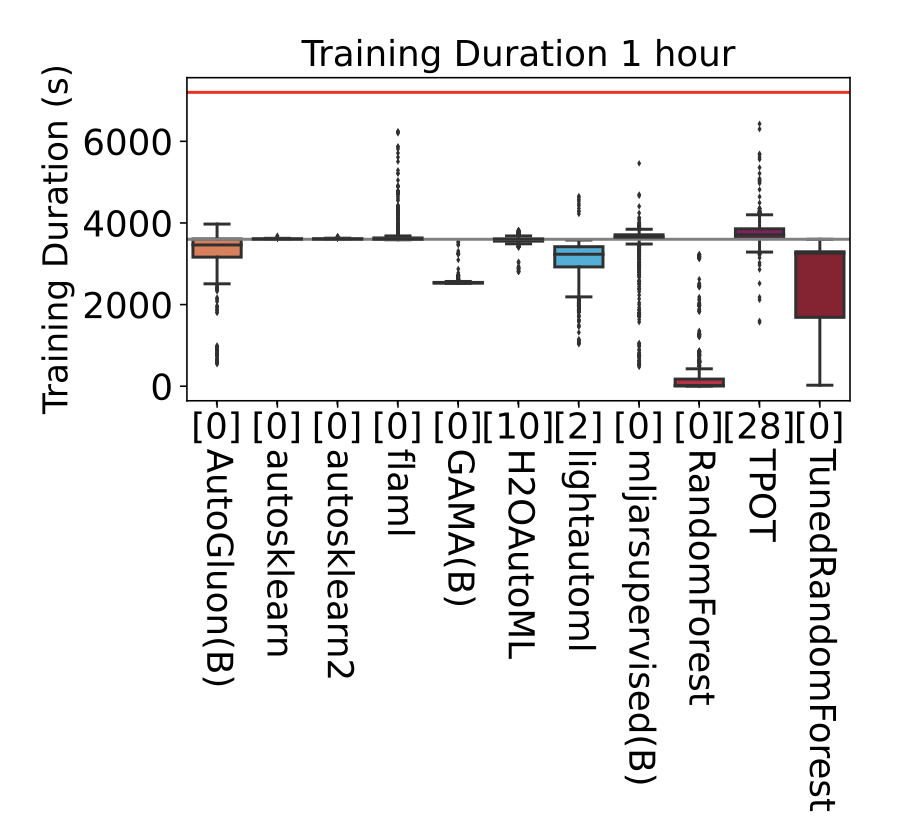| 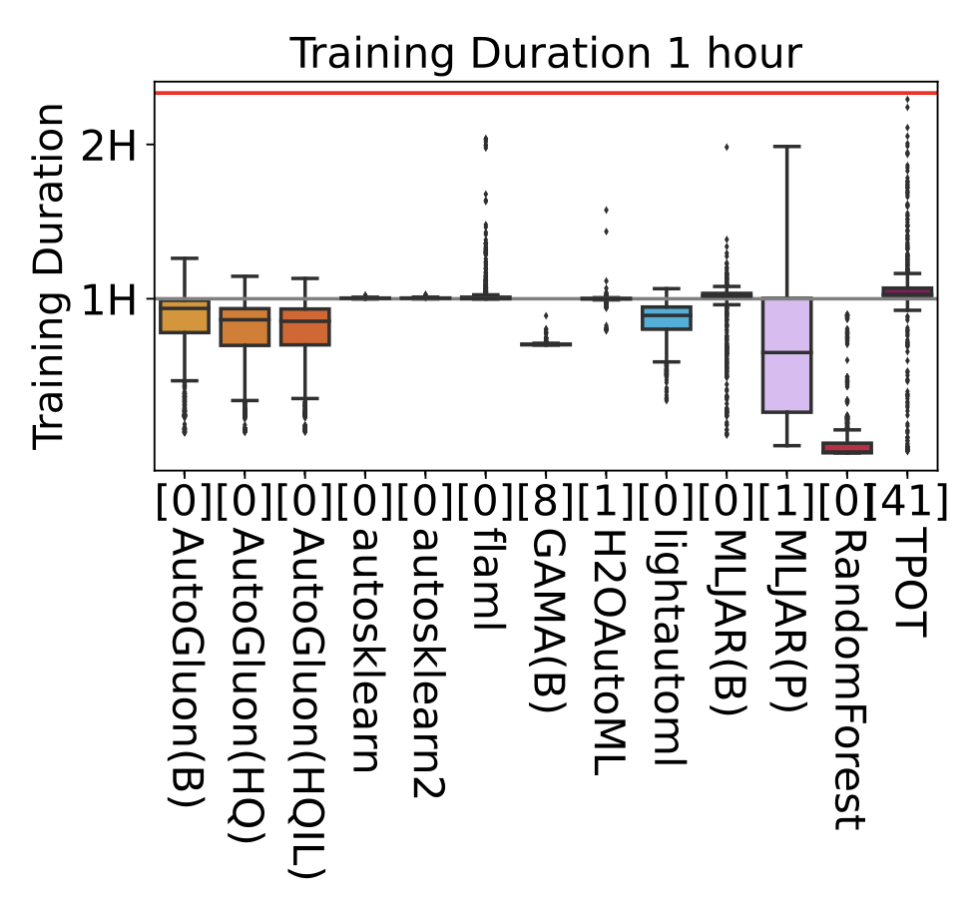 |
|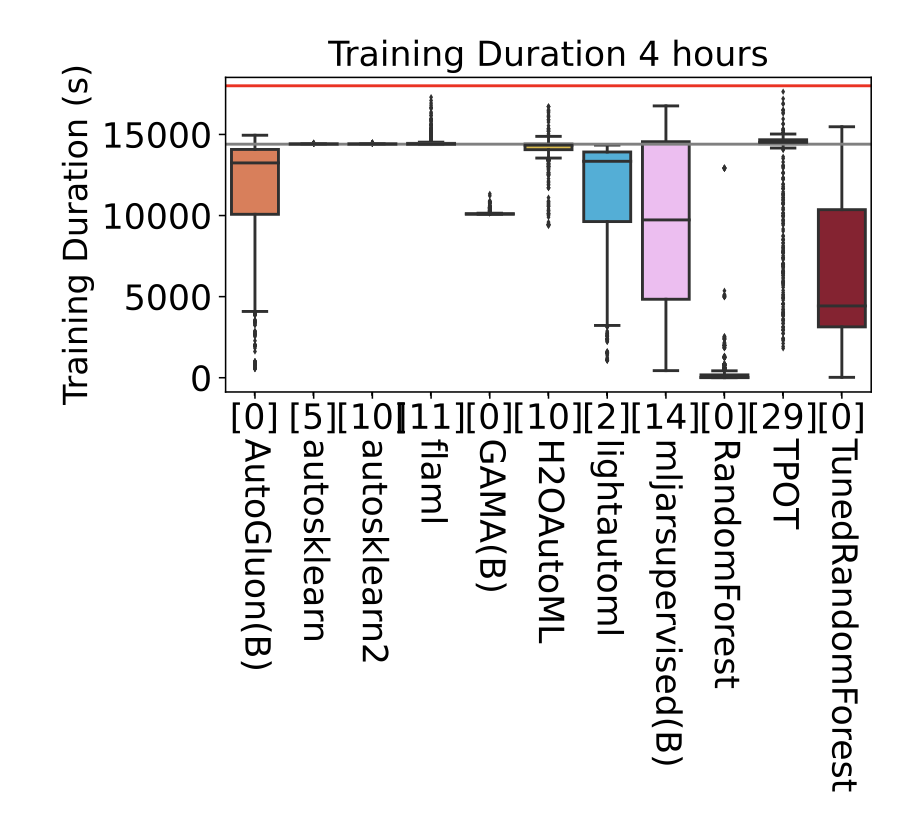| 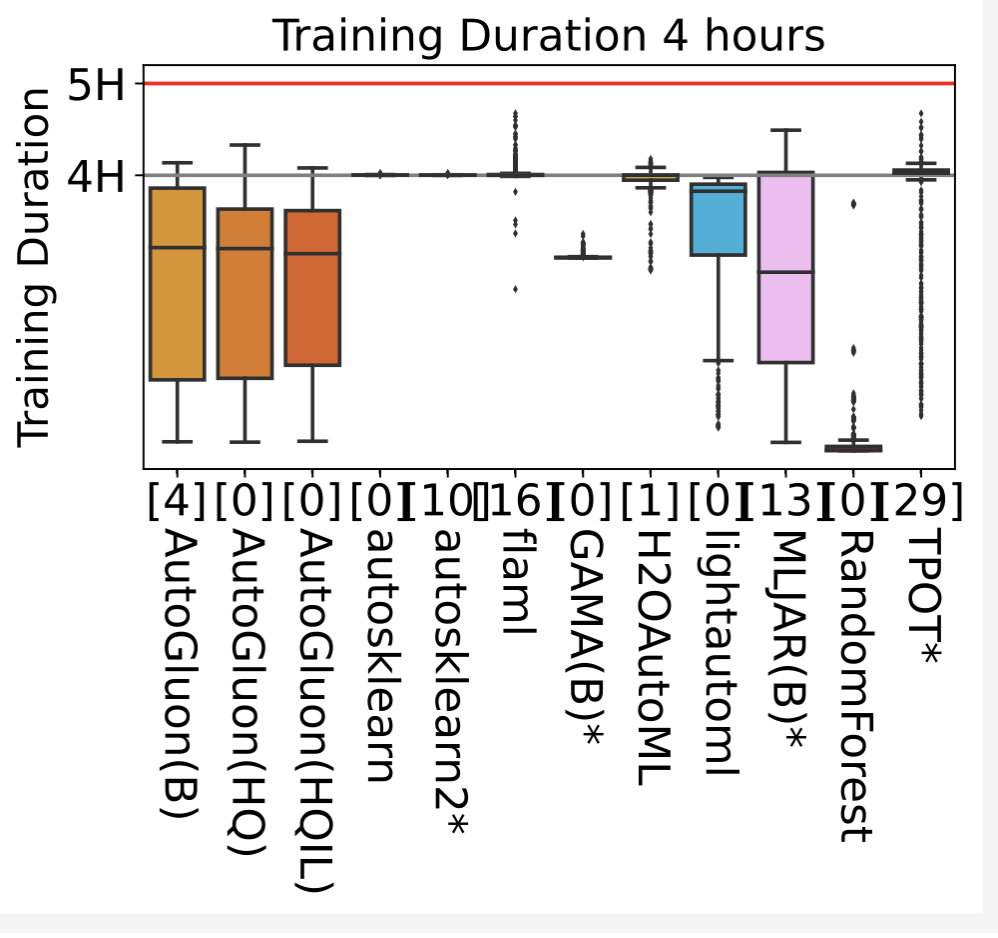 |